# ThinComplexity - Directed Graphs
#### Mi. 14.09.2022

In [1]:
# *** main imports - not all needed in this file ***

import numpy as np
# import scipy as sp # scientific Python 

import matplotlib.pyplot as plt
#from matplotlib.patches import Polygon

# import sympy as sym
# from IPython.display import display, Math
# import sympy.plotting.plot as symplot

# lib.scimath.sqrt
# from numpy.lib.scimath import sqrt as npsqrt

import networkx as nx


In [2]:
G = nx.DiGraph()

In [3]:
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')

list(G.nodes())


['Alice', 'Bob', 'Chuck']

In [4]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

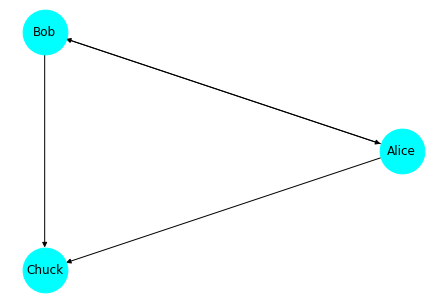

In [5]:
nx.draw_circular(G,
                 node_color="cyan",
                 node_size=2000,
                 with_labels=True)


In [6]:
positions = dict(Albany=(-74, 43),
                 Boston=(-71, 42),
                 NYC=(-74, 41),
                 Philly=(-75, 40))
G = nx.Graph()
G.add_nodes_from(positions)


In [7]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

G.add_edges_from(drive_times)


{('Albany', 'Boston'): Text(-72.5, 42.5, '3'),
 ('Albany', 'NYC'): Text(-74.0, 42.0, '4'),
 ('Boston', 'NYC'): Text(-72.5, 41.5, '4'),
 ('NYC', 'Philly'): Text(-74.5, 40.5, '2')}

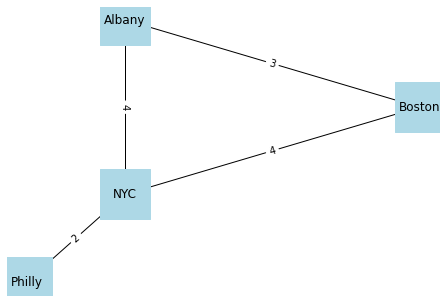

In [8]:
nx.draw(G, positions,
        node_color="lightblue",
        node_shape='s',
        node_size=2500,
        with_labels=True)
nx.draw_networkx_edge_labels(G, positions,
                             edge_labels=drive_times)

## Generating Graphs
#### Mi. 14.09.2022

In [9]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i>j:
                yield u, v

In [10]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

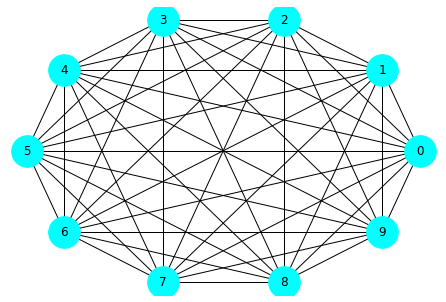

In [11]:
complete = make_complete_graph(10)
nx.draw_circular(complete,
                 node_color="cyan",
                 node_size=1000,
                 with_labels=True)


In [12]:
complete.neighbors(0)


In [13]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen


In [14]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

is_connected(complete)


True

## Random graphs
#### Mi. 14.09.2022


In [15]:
def flip(p):
        return np.random.random() < p


In [16]:
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge            


    
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G



In [17]:
np.random.seed(10)

random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

12

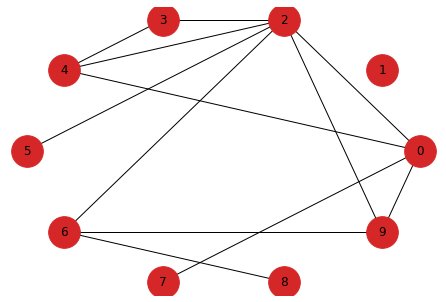

In [18]:
nx.draw_circular(random_graph, 
                 node_color='C3', 
                 node_size=1000, 
                 with_labels=True)
